<a href="https://colab.research.google.com/github/ArchanaBarigela/AI/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import math as mt
import random
import pandas as pd

In [5]:
data = pd.read_csv('/content/drive/MyDrive/slr09 (1).csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [6]:
outliers = []
def detect_outliers_zscore(data):
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if(np.abs(z_score) > thres):
      outliers.append(i)
  return outliers

In [7]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


In [8]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [9]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)

In [10]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min() 
y_max = data['Y'].max()
print(x_min, x_max, y_min, y_max)

6.7 8.8 35 262


In [11]:
from sklearn.preprocessing import MinMaxScaler
X1 = np.array(data['X']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)
data['X'] = X_scaled.reshape(1,-1)[0]

In [13]:
Y1 = np.array(data['Y']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(Y1)
Y_scaled = scaler.transform(Y1)
data['Y'] = Y_scaled.reshape(1,-1)[0]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

Initializing the Values.

In [17]:
m = random.uniform(-20, 20)
c = random.uniform(-20, 20)
eta = 0.1
epochs = 2000

Gradient Calculation

In [16]:
def gradient(m, c, x, y):
  m_deriv = -1*(y - m*x -c)*x;
  c_deriv = -1*(y - m*x - c)
  return m_deriv, c_deriv

Model Training

In [18]:
for iter in range(epochs):
  for sample in range(x_train.shape[0]):
    der_m, der_c = gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m = m - eta*der_m
    c = c - eta*der_c
print('Model Parameters are ', m, c)

Model Parameters are  -0.4098792904320424 0.6243271600558625


In [19]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m*i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)
print(y_pred_train)

[0.40962848 0.46818267 0.50721879 0.50721879 0.27300205 0.40962848
 0.54625491 0.21444787 0.33155624 0.44866461 0.50721879 0.56577298
 0.54625491 0.39011042 0.29252012 0.48770073 0.3510743  0.3510743
 0.62432716 0.50721879 0.54625491 0.40962848 0.27300205 0.42914655
 0.50721879 0.48770073 0.54625491 0.44866461 0.37059236 0.46818267]


In [20]:
y_pred_test = []
for i in x_test:
  y_pr_te = (m*i) + c
  y_pred_test.append(y_pr_te)
y_pred_test = np.array(y_pred_test)
print(y_pred_test)

[0.52673685 0.39011042 0.33155624 0.37059236]


Calculating the errors.

In [21]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)


Root mean square error 0.22624289812993795
Mean square error 0.05118584895423348
Mean absolute error 0.19362468980121966


In [22]:
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.26666938484906005
Mean square error 0.0711125608157761
Mean absolute error 0.25081123286180035


Deployment

In [23]:
X=float(input('Enter PH value of well water'))
print('X=',X)

x_nor = (X - x_min)/(x_max - x_min)
y_nor = m*x_nor + c

Y = y_nor*(y_max - y_min) + y_min 
print('Bi-carbonates = ',Y)

Enter PH value of well water8.5
X= 8.5
Bi-carbonates =  96.97146625147485


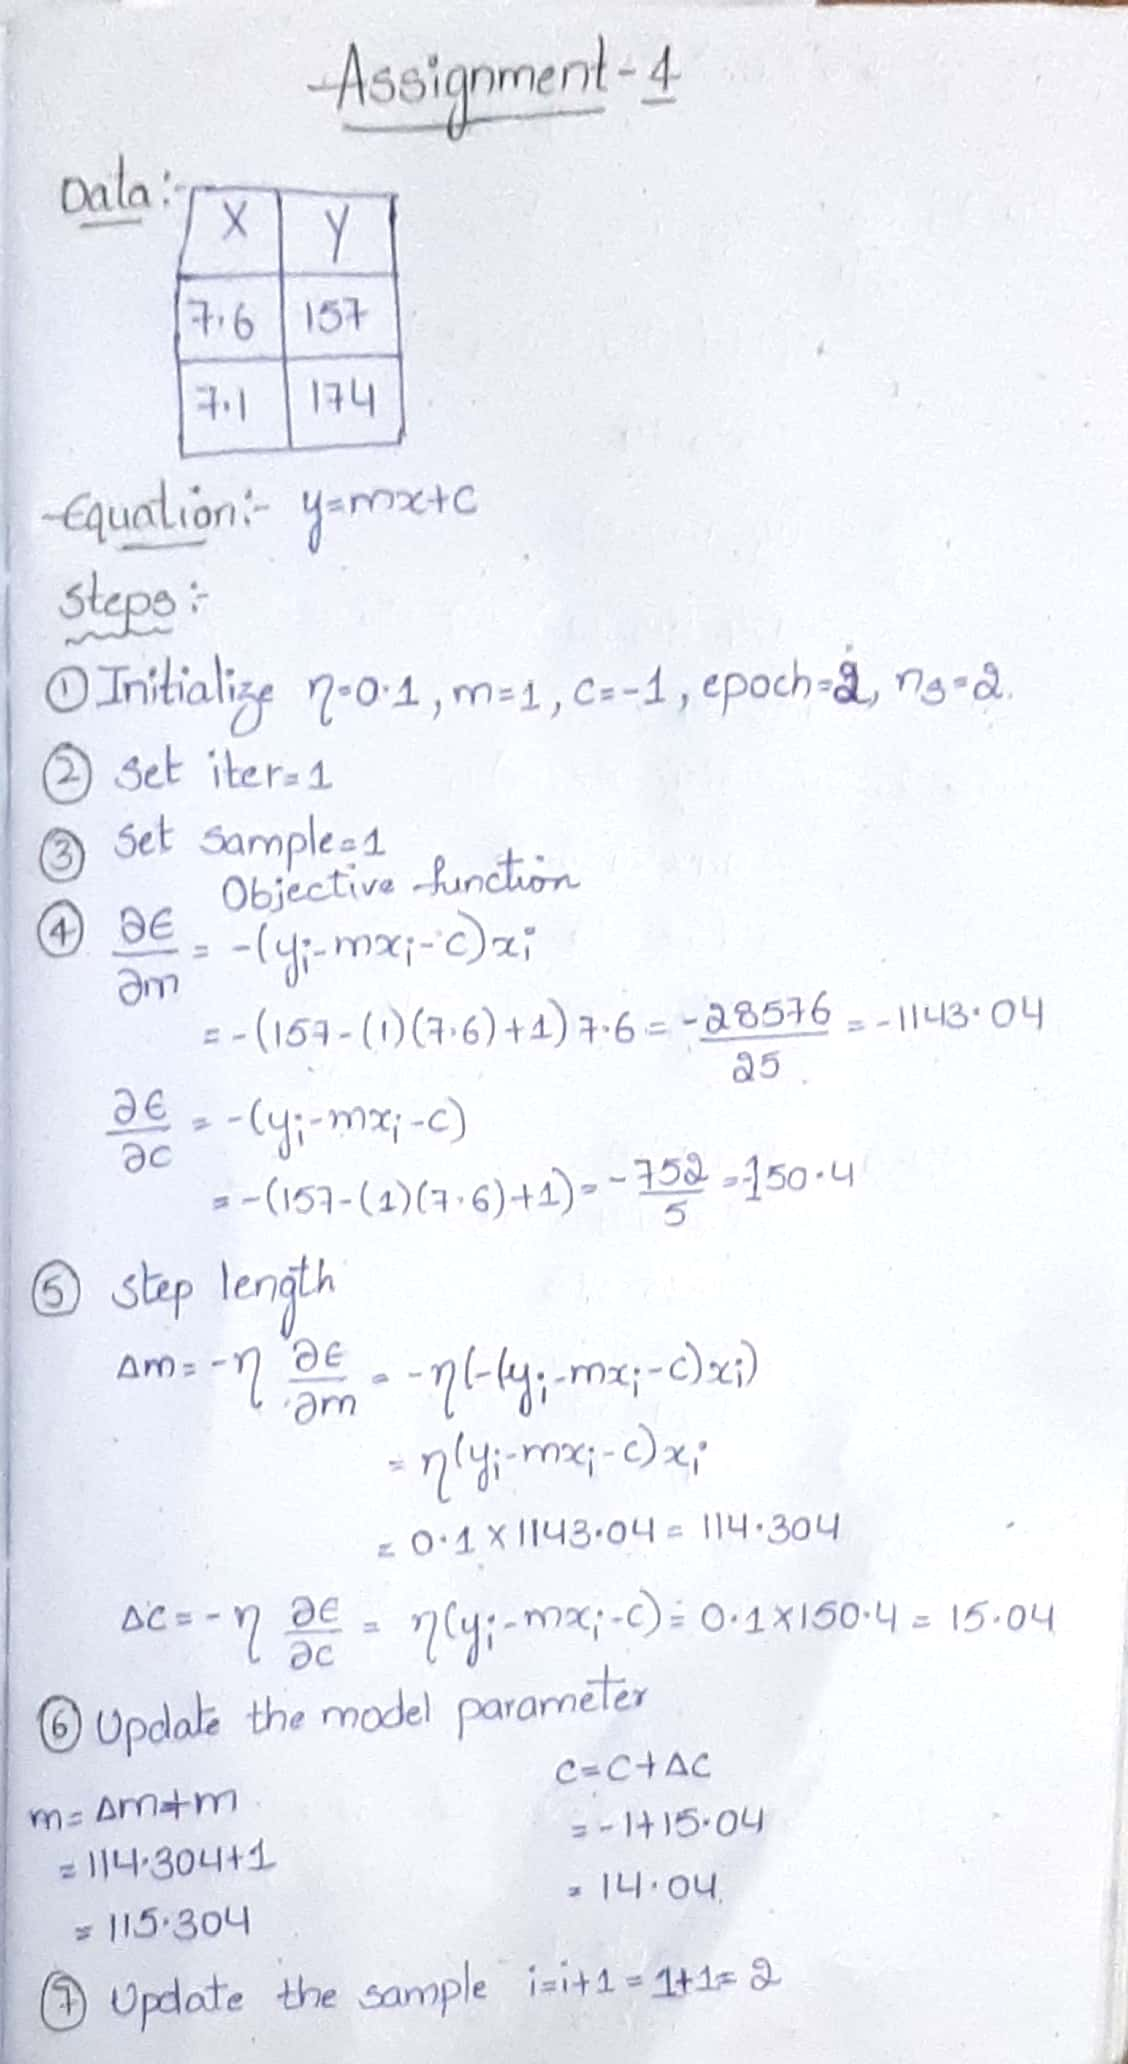

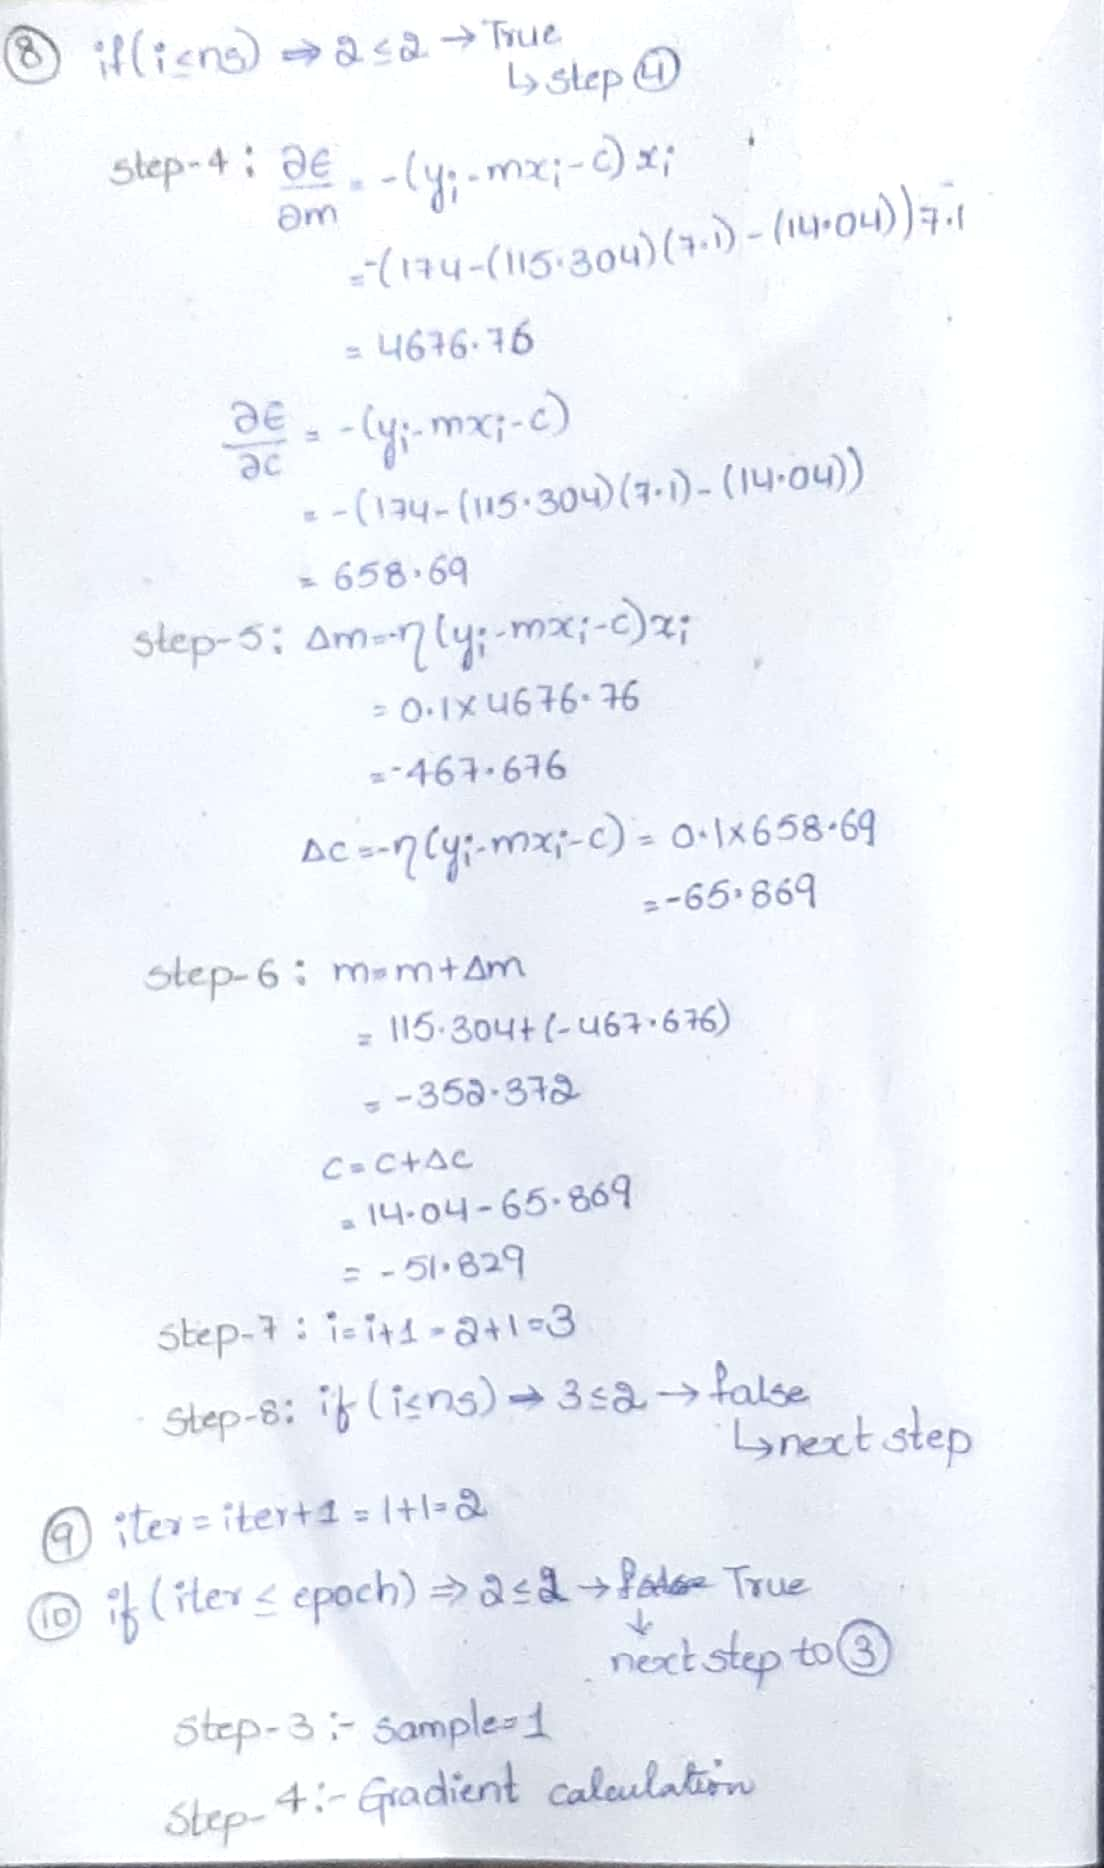

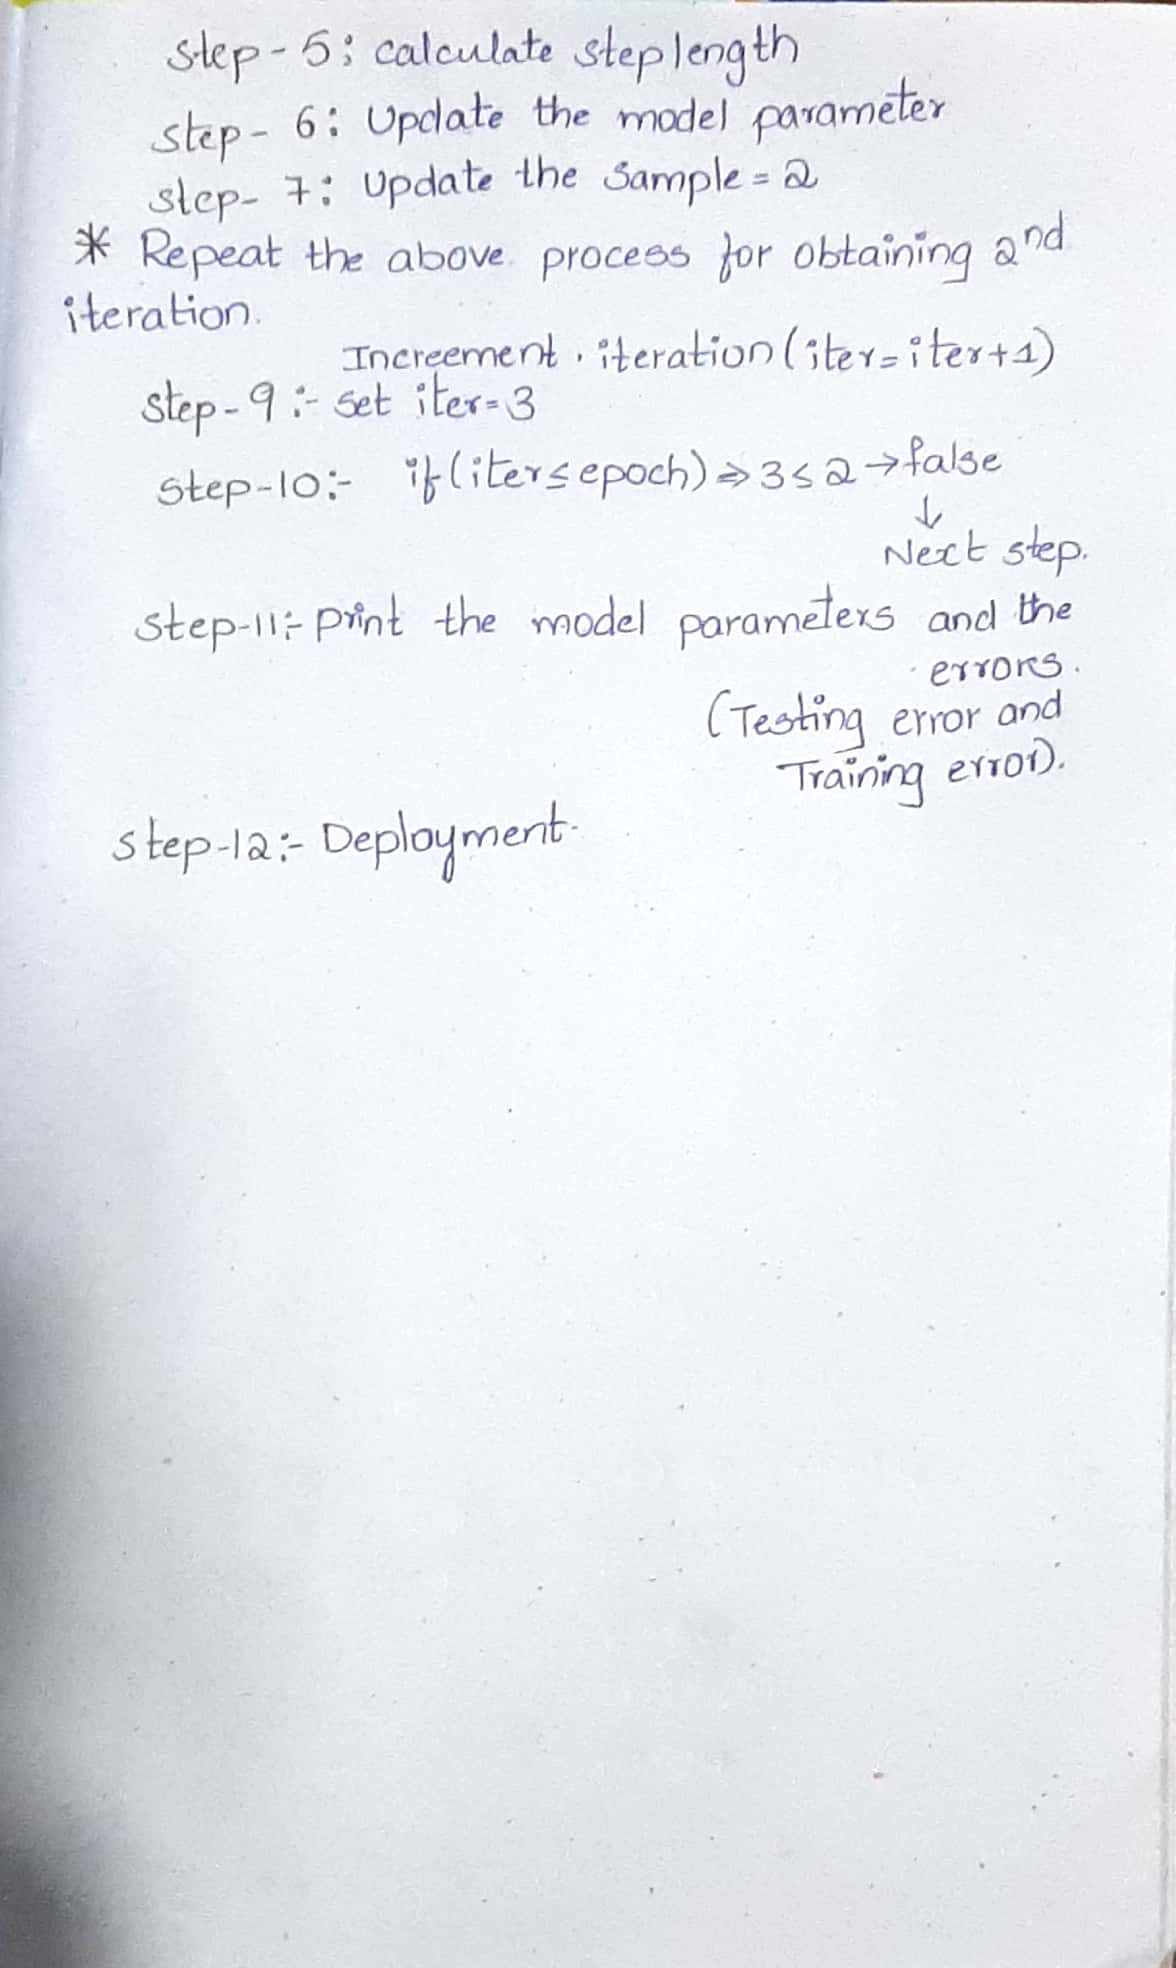